In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## PREPROCESSING 

### Loading the data

In [2]:
# Load the dataset
iris = load_iris()

# Create a DataFrame with the features
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target (species)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### Handling any missing values

In [3]:
## checking for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

## EXPLORATION

### Summary statistics

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Pair plot

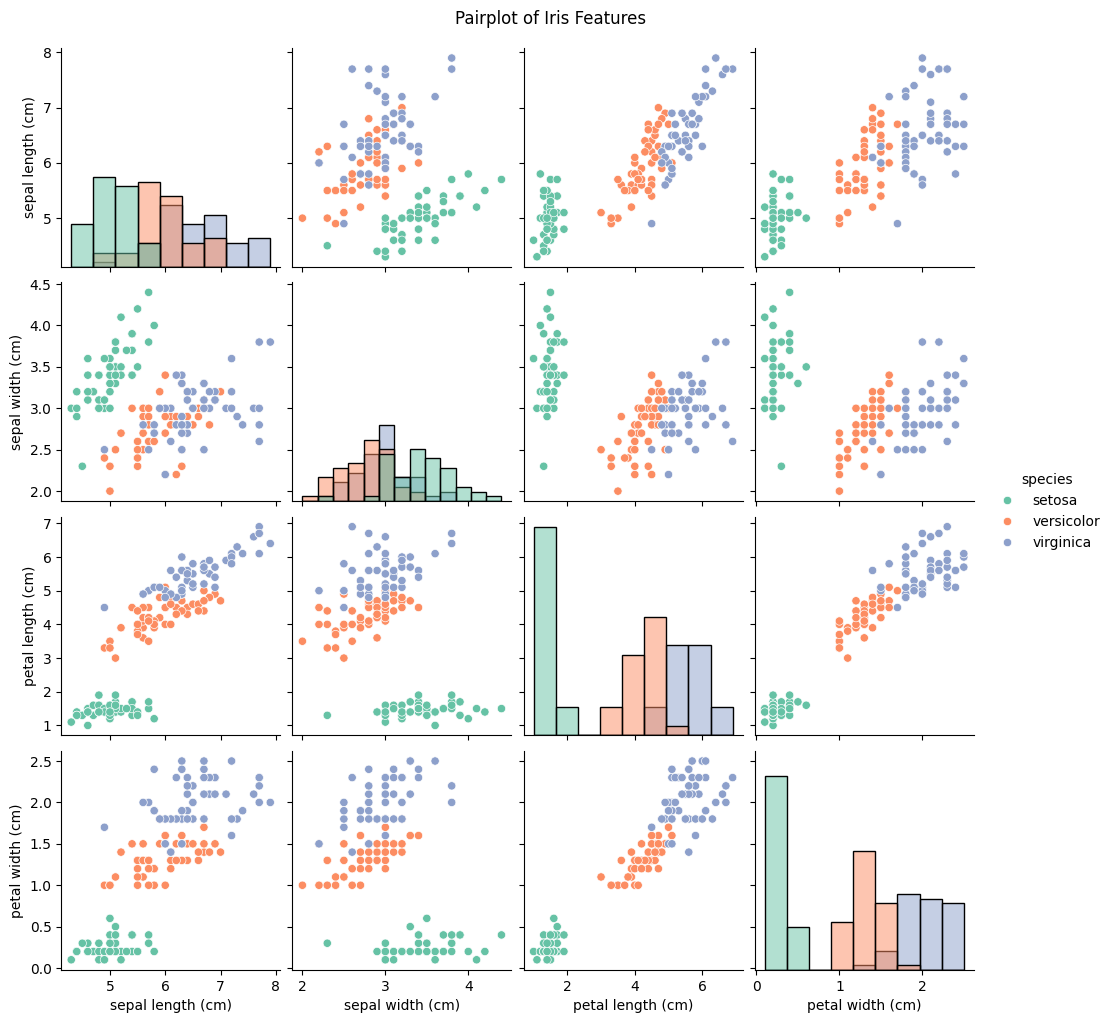

In [5]:
sns.pairplot(df, hue='species', diag_kind='hist', palette='Set2')
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

This pairplot visualizes the relationships between all pairs of Iris dataset features, color-coded by species (setosa, versicolor, virginica).
Petal length and petal width are the most discriminative features, clearly separating setosa from the other species and providing some separation between versicolor and virginica. Sepal measurements are less distinctive but can still aid in classification when combined with petal measurements

### Correlation Heat Map

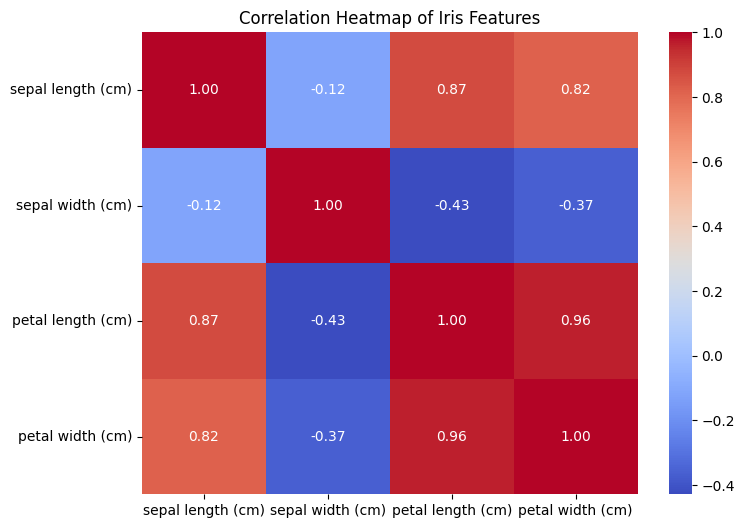

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Iris Features")
plt.show()



**Interpretation of heatmap:**
- Petal length and petal width exhibit a very high positive correlation (0.96), indicating that longer petals are almost always wider. Sepal length also shows strong positive correlations with petal length (0.87) and petal width (0.82), suggesting that larger sepals are associated with larger petals. In contrast, sepal width has weak or moderate negative correlations with the other features, particularly petal length (-0.43) and petal width (-0.37), meaning that flowers with wider sepals tend to have smaller petals.

### Outlier detection with boxplots

C:\Users\Admin\AppData\Local\Temp\ipykernel_23248\3158035918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=df, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_23248\3158035918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=df, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_23248\3158035918.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='species', y=col, data=df, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_23248\3158035918.py:4: Future

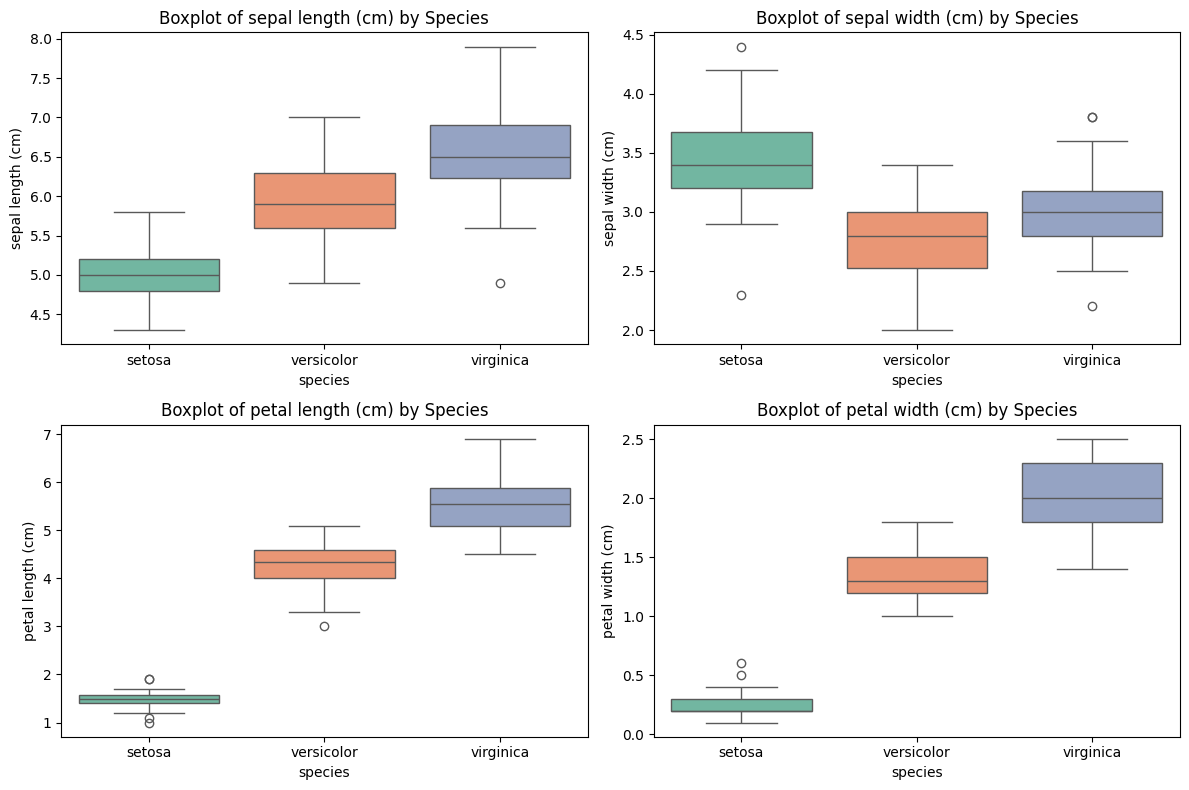

In [7]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):  # exclude 'species'
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot of {col} by Species')
plt.tight_layout()
plt.show()

These box plots above show very few outliers which could be a a result of the natural variation in flower measurements and can be kept since they are harmless for most models

## TRAIN TEST SPLITTING

### Separating features and target

In [8]:
X = df.drop('species', axis=1)
y = df[['species']]


### Splitting the data into train/test (80/20)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Scaling features of both the train and test data set
- Scaling is done after splitting to avoid leakage

Scaling on numeric features

In [10]:

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

### Label Encoding on Species

In [11]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [12]:
print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_train_encoded:", y_train_encoded.shape)
print("y_test_encoded:", y_test_encoded.shape)


X_train_scaled: (120, 4)
X_test_scaled: (30, 4)
y_train_encoded: (120,)
y_test_encoded: (30,)


### Saving the files for use in clustering

In [13]:
# Save features
X_train_scaled.to_csv("data/X_train.csv", index=False)
X_test_scaled.to_csv("data/X_test.csv", index=False)

# Save targets
pd.DataFrame(y_train_encoded, columns=['species']).to_csv("data/y_train.csv", index=False)
pd.DataFrame(y_test_encoded, columns=['species']).to_csv("data/y_test.csv", index=False)

print("Datasets saved as CSV files successfully.")


Datasets saved as CSV files successfully.
